## Welcome!

Here we will learn how to explore datasets which depend on time. As you might imagine, many datasets in the real world are timeseries. The stock market springs to mind, but also anything to do with sales or marketing, engineering processes (when will this particular turbine break, you may ask?), medical processes (what is the effect of this medication over time), and so many, many more.

## Pandas for Timeseries 

In this BLU we will not learn any fancy prediction stuff, but rather how to wrangle timeseries data. 

Imports: 

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 
import utils
import matplotlib 


np.random.seed(1000)
%matplotlib inline 
plt.rcParams['figure.figsize'] = [16, 4]

### Timestamps 

The timestamp is the most basic form of time series indexer that Pandas has. It does exactly what the name describes: marks the exact moment in which the data was collected. 

An event happens, and the time of the event is dumped into a database. 

One example of this would be... bitcoin! Now, whatever you may think about bitcoin, ( _whether it is a ponzi scheme or a perfectly legitimate way to destroy the environment while helping organ traffickers and kidnappers launder money_ ), it is an excellent source of high-granularity data. Let's dive in! 

In [2]:
data = pd.read_csv('data/bitcoin.csv')

Let's take a look:

In [3]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2017-01-01 00:00:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
1,2017-01-01 00:01:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2,2017-01-01 00:02:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
3,2017-01-01 00:03:00,973.36,973.36,973.36,973.36,0.040000,38.934400,973.360000
4,2017-01-01 00:04:00,973.36,973.40,973.36,973.39,5.458800,5313.529708,973.387871


In [4]:
data.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
647996,2018-03-26 23:56:00,8155.00,8155.00,8154.99,8154.99,0.617945,5039.342643,8154.997667
647997,2018-03-26 23:57:00,8154.99,8154.99,8154.00,8154.01,40.655410,331543.193980,8154.958865
647998,2018-03-26 23:58:00,8154.00,8154.01,8150.00,8150.00,9.856911,80340.432933,8150.670628
647999,2018-03-26 23:59:00,8150.01,8150.01,8122.82,8145.00,68.274269,555026.852280,8129.370847
648000,2018-03-27 00:00:00,8144.99,8145.01,8140.00,8140.00,37.842674,308202.442620,8144.309384


Interesting. We have this `Timestamp` column, that we can kind of parse by looking at it. 

In [5]:
data.Timestamp.head()

0    2017-01-01 00:00:00
1    2017-01-01 00:01:00
2    2017-01-01 00:02:00
3    2017-01-01 00:03:00
4    2017-01-01 00:04:00
Name: Timestamp, dtype: object

We can kind of understand this. Looks like Year, month, and day, then hours, minutes, then seconds. But the dtype is just object, how boring.

However, pandas can do something pretty amazing with these objects: 

In [6]:
time_as_a_timestamp = pd.to_datetime(data.Timestamp, infer_datetime_format=True)

What is it now? 

In [7]:
time_as_a_timestamp.head()

0   2017-01-01 00:00:00
1   2017-01-01 00:01:00
2   2017-01-01 00:02:00
3   2017-01-01 00:03:00
4   2017-01-01 00:04:00
Name: Timestamp, dtype: datetime64[ns]

It is a `datetime64[ns]`, which I shall for the sake of simplicity just refer to as a TimeStamp. 

In [42]:
time_as_a_timestamp.min()

Timestamp('2017-01-01 00:00:00')

In [43]:
time_as_a_timestamp.max()

Timestamp('2018-03-27 00:00:00')

What can we do with this? Well, for one thing, extracting days, months etc is trivial:

In [44]:
time_as_a_timestamp.dt.day.head()

0    1
1    1
2    1
3    1
4    1
Name: Timestamp, dtype: int64

Notice the nomenclature. `Series.dt.<whatever I want>`. 

And we can want [just about anything we can think of!](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components)

In [11]:
# I'll make a little dataset so that we can see some of the results side by side
new = pd.DataFrame()
new['date'] = time_as_a_timestamp
new.head(3)

,date
0,2017-01-01 00:00:00
1,2017-01-01 00:01:00
2,2017-01-01 00:02:00


In [12]:
new['day'] = new['date'].dt.day
new['month'] = new['date'].dt.month
new['year'] = new['date'].dt.year
new['hour'] = new['date'].dt.hour
new['minute'] = new['date'].dt.minute
new['second'] = new['date'].dt.second
new['day of the week'] = new['date'].dt.weekday
new['day of the week name'] = new['date'].dt.day_name()
new['quarter'] = new['date'].dt.quarter
new['is it a leap year?'] = new['date'].dt.is_leap_year

new.head(5)

,date,day,month,year,hour,minute,second,day of the week,day of the week name,quarter,is it a leap year?
0,2017-01-01 00:00:00,1,1,2017,0,0,0,6,Sunday,1,False
1,2017-01-01 00:01:00,1,1,2017,0,1,0,6,Sunday,1,False
2,2017-01-01 00:02:00,1,1,2017,0,2,0,6,Sunday,1,False
3,2017-01-01 00:03:00,1,1,2017,0,3,0,6,Sunday,1,False
4,2017-01-01 00:04:00,1,1,2017,0,4,0,6,Sunday,1,False


Pandas... is amazing. 

### Selecting 

Now, back to our data. Let's try to ask some useful questions, such as 
> " _How has the price of bitcoin varied over time?_ "

In [13]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2017-01-01 00:00:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
1,2017-01-01 00:01:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2,2017-01-01 00:02:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
3,2017-01-01 00:03:00,973.36,973.36,973.36,973.36,0.040000,38.934400,973.360000
4,2017-01-01 00:04:00,973.36,973.40,973.36,973.39,5.458800,5313.529708,973.387871


Let's start by making the timestamp the index. This is common good practice, for reasons we shall soon see. 

In [14]:
data.Timestamp = pd.to_datetime(data.Timestamp, infer_datetime_format=True, yearfirst=True)

data = data.set_index('Timestamp',    # <---- Set the index to be our timestamp data  
                      drop=True)      # <---- drop the original column

In [15]:
data.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2017-01-01 00:00:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2017-01-01 00:01:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2017-01-01 00:02:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2017-01-01 00:03:00,973.36,973.36,973.36,973.36,0.040000,38.934400,973.360000
2017-01-01 00:04:00,973.36,973.40,973.36,973.39,5.458800,5313.529708,973.387871


When you have a datetime index, you should always, always, always sort it! 

( _Note: I **deliberately won't remind you to do this in the exercises**, and if you forget, you will get wrong answers!_ )

In [16]:
data = data.sort_index()

In [17]:
print('We have data between %s and %s' % (data.index.min(), data.index.max()))

We have data between 2017-01-01 00:00:00 and 2018-03-27 00:00:00


So we know that somewhere about [Jan 17th, bitcoin had a slight crash](https://www.cnbc.com/2018/01/17/bitcoin-tests-important-price-level-after-dramatic-plunge.html). Let's try to select that time. 

In [18]:
data.loc['Jan 17th 2018'].head()   # <--- wait, you can do that???

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2018-01-17 00:00:00,11570.01,11570.01,11570.00,11570.00,37.374867,4.324275e+05,11570.006518
2018-01-17 00:01:00,11570.01,11699.00,11550.00,11627.09,82.549136,9.575156e+05,11599.340993
2018-01-17 00:02:00,11605.00,11700.22,11550.00,11624.00,78.062113,9.092036e+05,11647.181988
2018-01-17 00:03:00,11624.00,11790.00,11603.14,11725.38,92.075967,1.081329e+06,11743.878594
2018-01-17 00:04:00,11725.52,11800.00,11725.51,11799.99,97.790853,1.153220e+06,11792.718569


Pretty cool huh? Now that we have a datetime index, we can do some crazy selecting, including just writing dates in that way. 

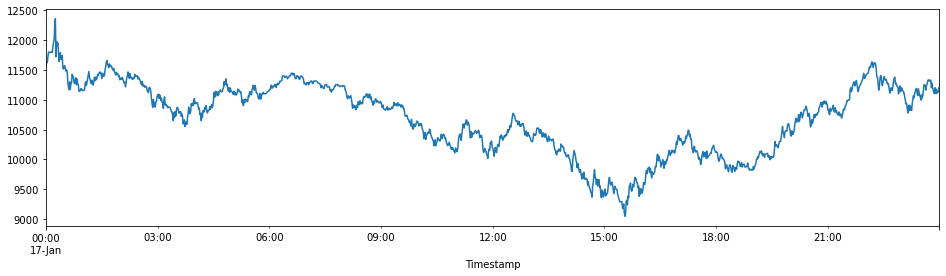

In [19]:
data.loc['Jan 17th 2018'].Close.plot(); 

We can also select less specific date ranges. How's January? 

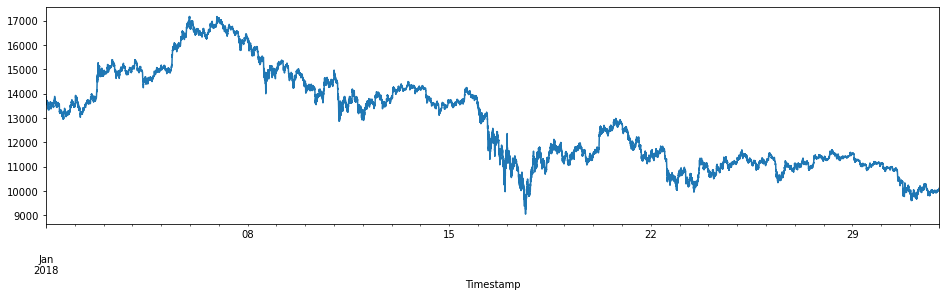

In [20]:
data.loc['Jan 2018'].Close.plot(); # <--- Pandas... is... awesome 

Let's see those days between the 15th and the 22nd. Let's select in a different way, for the sake of giggles. 

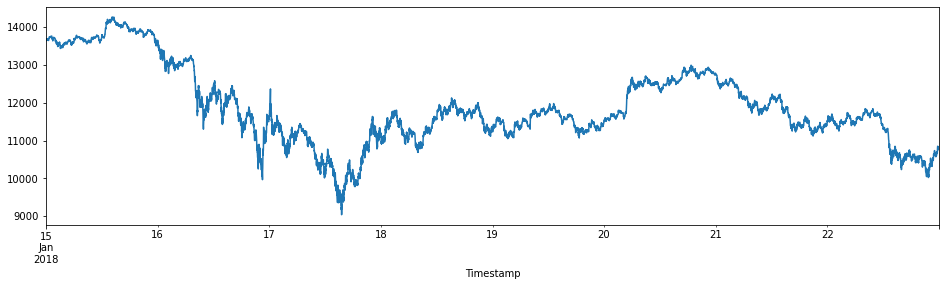

In [21]:
data.loc['01/15/2018':'01/22/2018'].Close.plot();  # <--- remember, American dates are less error prone in Pandas 

Interesting. What were things like during that "drop"? From our first chart, we saw it was on the 17th, between 3PM and 4PM. Let's create a slice, so that we can access this interval without having to write every time.

In [22]:
interval = slice('01/17/2018 1:30PM','01/17/2018 4:30PM') # yep, minutes, seconds, up to nanoseconds actually! 

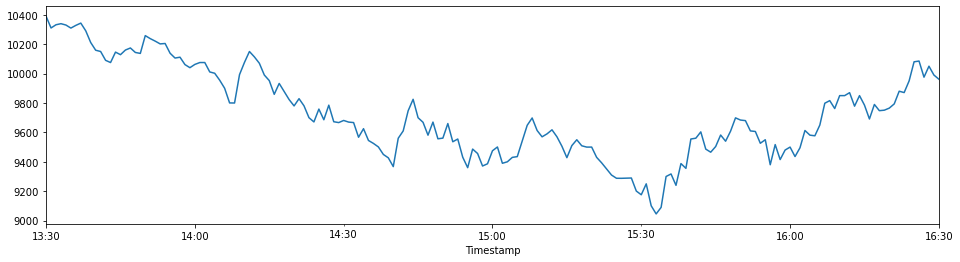

In [23]:
data.loc[interval].Close.plot();  

How did traders react? Let's get the volume 

## Groupby for timeseries!

So... Let's get our volume per minute! For this, we can use [resample](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwi3jfnKgNnaAhUGvBQKHRCwBd4QFggpMAA&url=https%3A%2F%2Fpandas.pydata.org%2Fpandas-docs%2Fstable%2Fgenerated%2Fpandas.DataFrame.resample.html&usg=AOvVaw1le9agxvLanaQp9zlNYG9Y)

In our case, we'll resample to every 5 minutes, and take the sum (because we want to sum the volume of those 5 minutes). 

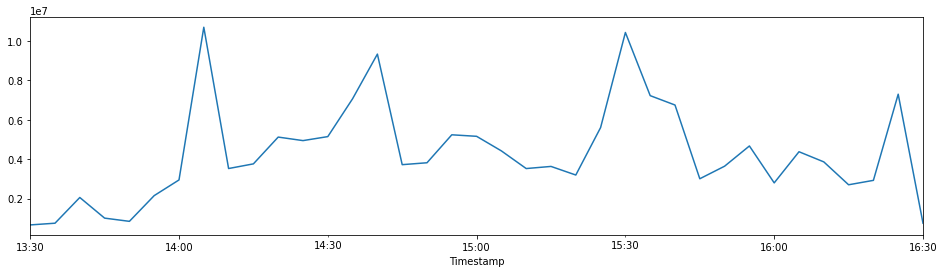

In [24]:
data.loc[interval]['Volume_(Currency)'].resample('5 min').sum().plot()

Wow! 

Here's a question: How much money (in dollars) was traded in the largest 10 minutes peak?

In [25]:
money = data.loc[interval]['Volume_(Currency)'].resample('10 min').sum().max()

print('In 10 minutes, %0.1f dollars were traded in Bitcoin' % money)

In 10 minutes, 17657576.5 dollars were traded in Bitcoin


And when did it happen?

In [26]:
data.loc[interval]['Volume_(Currency)'].resample('10 min').sum().idxmax()

Timestamp('2018-01-17 15:30:00', freq='10T')

We just took the sum, but what about if we were looking at prices, would that make sense?

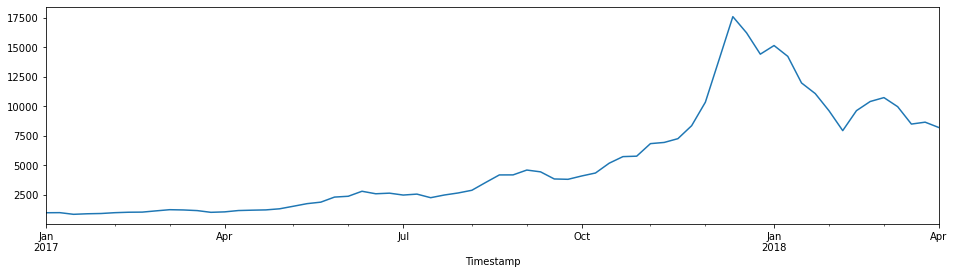

In [27]:
data.resample('W').Close.mean().plot();  # the mean weekly closing prices, since 2015

Time... is... cool. 

What if we wanted to know the total amount of money that has been traded in bitcoin? 

One way would simply be to sum it, but that doesn't give us any idea of how that total varied over time: 

In [28]:
data['Volume_(Currency)'].sum()

51301590508.0701

One cooler way to see this over time is to use the cumulative sum:

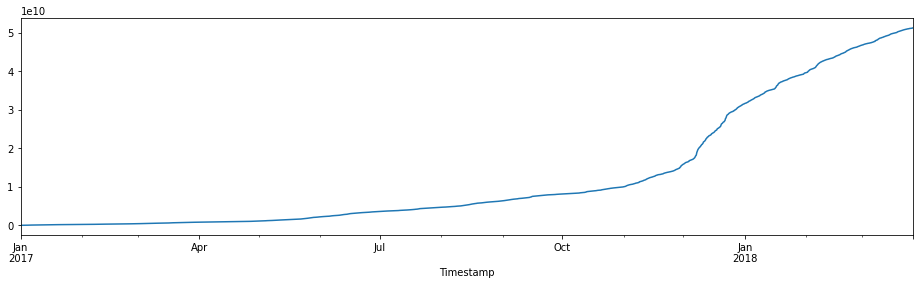

In [29]:
data['Volume_(Currency)'].cumsum().plot();  # the total volume traded since the start 

As you've learnt before, there are many cool [methods for groupby](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html). 

A more important question however may be 
> " _what were the biggest variations in price?_ "

For this, we might find it useful to calculate consecutive differences between periods, using [diff](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.diff.html)

In [31]:
data.Close.diff().head()  # this can take a few seconds to run

Timestamp
2017-01-01 00:00:00     NaN
2017-01-01 00:01:00    0.00
2017-01-01 00:02:00    0.00
2017-01-01 00:03:00    0.01
2017-01-01 00:04:00    0.03
Name: Close, dtype: float64

The first entrance is NaN, which makes sense because it's got no previous day to subtract. 

What do the diffs look like? 

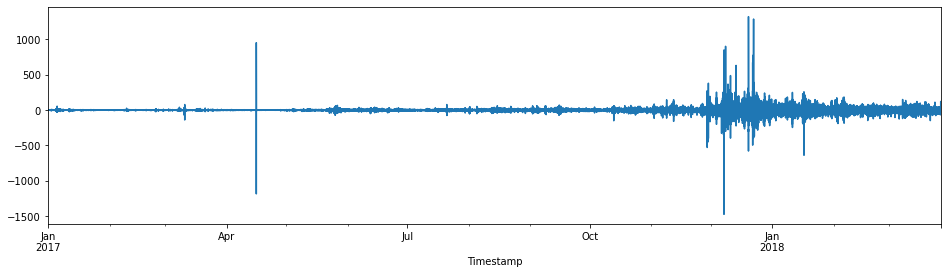

In [32]:
data.Close.diff().plot();

Not particularly useful. How about on a particular day? 

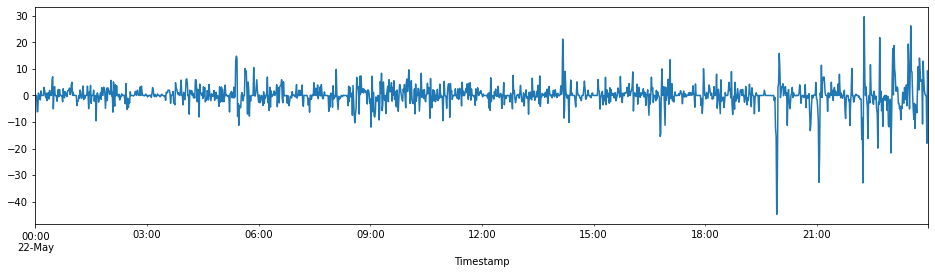

In [33]:
data.loc['May 22nd 2017'].Close.diff(periods=1).plot();

### Subsetting

We can use our subsetting tools that we learned in the previous unit, and apply them here!

Let's find if there were any periods in may 22 after where the price went up by 20$.

In [50]:
may_22_diff = data.loc['May 22nd 2017'].Close.diff(periods=1)
over20_mask = may_22_diff > 20 # vector of Trues and Falses
may_22_diff[over20_mask]

Timestamp
2017-05-22 14:10:00    21.25
2017-05-22 22:16:00    29.71
2017-05-22 22:41:00    21.83
2017-05-22 23:31:00    26.25
Name: Close, dtype: float64

## Rolling windows

Another useful groupby method is [rolling windows](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html). They do what their name suggest: aggregate the previous X periods using a certain function, for instance the mean. They are very useful to **smooth** choppy timeseries and be less reactive to noise. 

Let's say it's December 18th, in the early morning, and we are at our terminal. 

##### Midnight and a bit... 

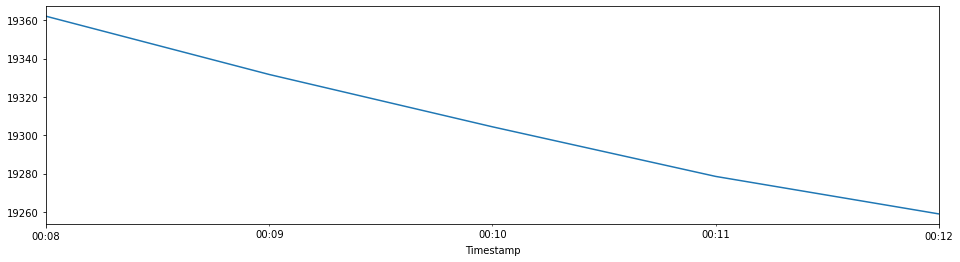

In [34]:
data.loc['Dec 18th 2017 00:08:00':'Dec 18th 2017 00:12:00', 'Weighted_Price'].plot();

![](https://i.imgflip.com/29iucd.jpg)

##### A few minutes pass... 

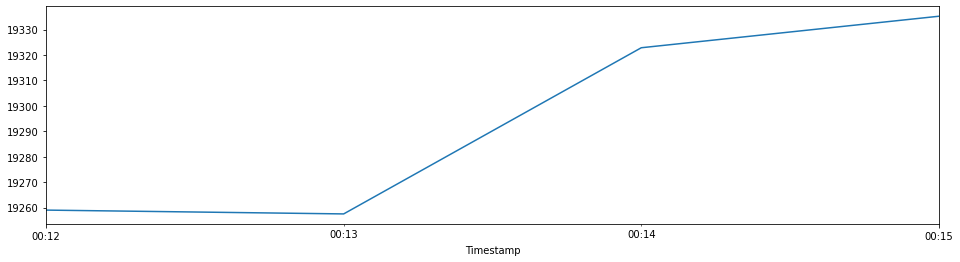

In [35]:
data.loc['Dec 18th 2017 00:12:00':'Dec 18th 2017 00:15:00', 'Weighted_Price'].plot();

![](https://i.redditmedia.com/VE5dgdjQ8FKZ47gdxJdQ07q36bsZVyhvAmllvLdtTnI.jpg?w=534&s=ce869cd0d8630cd420af7fa72b3c296d)

##### A few more minutes... 

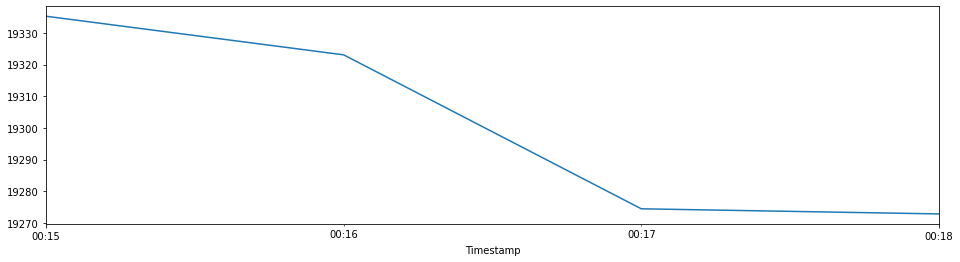

In [36]:
data.loc['Dec 18th 2017 00:15:00':'Dec 18th 2017 00:18:00', 'Weighted_Price'].plot();

![](https://i.imgflip.com/29iucd.jpg)

I think you get the picture. What's going on is that **we're being extremely reactive to noise**, and missing the underlying process.

#### The first hour of Dec 18th 2017, as seen by traders

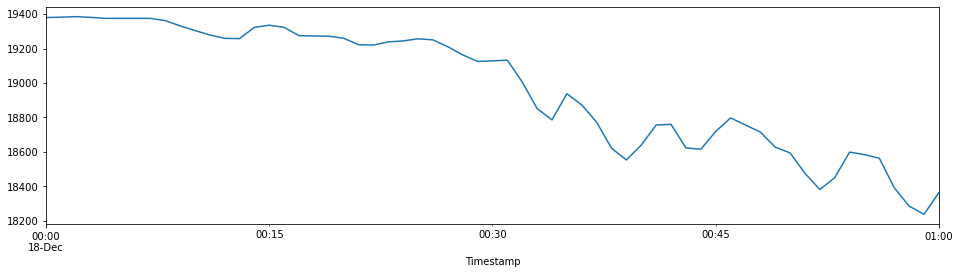

In [37]:
data.loc['Dec 18th 2017 00:00:00':'Dec 18th 2017 01:00:00', 'Weighted_Price'].plot();

#### The first hour of Dec 18th 2017, as seen by a rolling window of 10 minutes

In [38]:
# this is just the raw data, so we can apply a rolling window on it  
first_hour = data.loc['Dec 18th 2017 00:00:00':'Dec 18th 2017 01:00:00', 'Weighted_Price']

# notice the window size as a parameter of rolling, feel free to mess around with that parameter.
# Also notice how we use the mean. We can use many others. Try changing it! 
window_size = 10
first_hour_rolling_window = first_hour.rolling(window=window_size).mean()

What do these look like? 

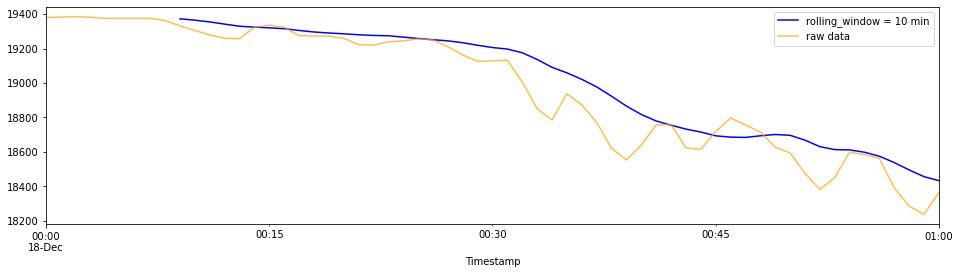

In [39]:
# Let's plot these together 
first_hour_rolling_window.plot(color='b', label='rolling_window = %0.0f min' % window_size);
first_hour.plot(label='raw data', alpha=.7, ls='-', color='orange');
plt.legend();

As you can see, the rolling mean appears as a smoother version of the original signal, this can be a great help when looking at noisy signals and you just want to get an idea of the overall trend. Also note that when doing the rolling mean you get a delayed version of the original signal, due to the nature of how it is calculated.

( _Note: In case you are curious about what would have happened if you had interpreted the yellow line as a potential recovery... It doesn't end well._ )

### Let's ask some more questions of this dataset! 

Back to the entire  dataset. Let's answer the following question:
> What was the weekly change in price, over time? 

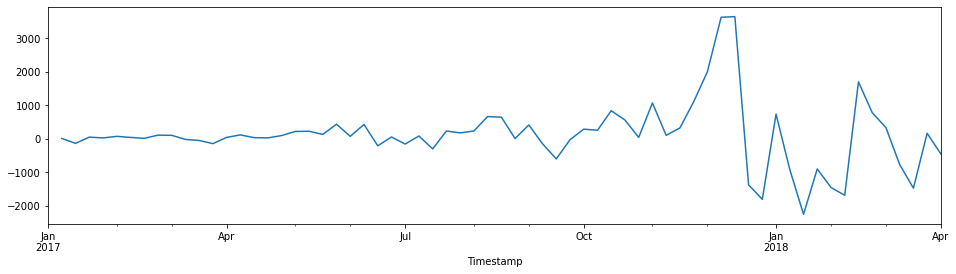

In [40]:
# resample to weekly, get the mean Close price (per week), calculate the differences, and plot them 
data.resample('W').Close.mean().diff(periods=1).plot()

We are observing something that makes sense. As the magnitude gets bigger, so does the volatility. It makes more sense for bitcoin to go down \\$100 in a week when it was \\$5000 than when it was at \\$200. 

What we actually want... is the percent change. 

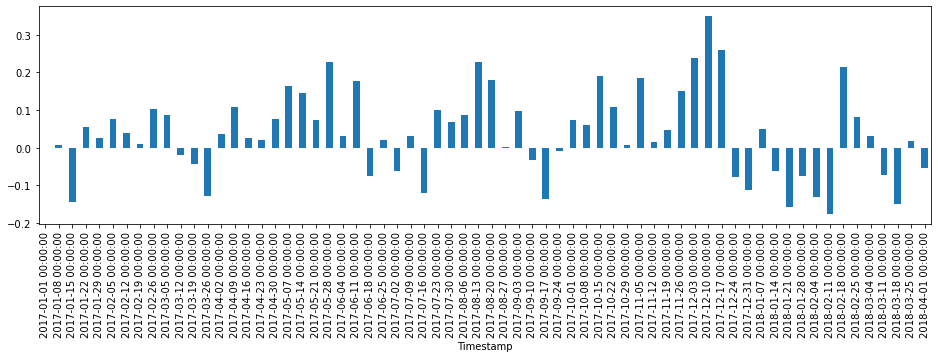

In [41]:
# resample to weekly, take the mean close price (weekly), and calcualte the percentage change 
data.resample('W').Close.mean().pct_change().plot(kind='bar');

Great, we've covered a number of methods for dealing with Timeseries. 

Next up, we go and try to examine the full stock market. Only to find, to our dismay, that we need multi-indexing. [What is multi-indexing, I hear you ask?](https://www.youtube.com/watch?v=gC24hhNbXN0)

----

### **Summary of the methods we have learned:**
* `pd.to_datetime()` - this allows you to create datetime format and gives you access to several methods that pandas has specifically to handle dates 
* We need to have a datetime sorted index!!
* Selection: `dataframe.loc['Jan 17th 2018']` to select the 17th of January, 2018 
    * Remember pandas is really helpful here as you can even do something like `dataframe.loc['Jan 2018']` or even ranges `dataframe.loc['01/15/2018':'01/22/2018']`
    * If you're going to analyse the same interval several times, then using slice() can help a lot.
*  How to Group by in time series. Don't forget that after grouping the data we need an aggregation function! 
 * **resample**, e.g: `.resample('5min').sum()`.
 * **Rolling window**: `.rolling()`
    * few new aggregation functions that we've talked: 
        * `sum()`
        * `cumsum()`
        * `cummax()`
        * `max()`
        * ...
* We have also learnt how to calculate the difference between periods, using `diff()` and `pct_change`